In [ ]:
%%time
from CPT.CPT import *
layout = CPT()
layout.MESH_EXTENT = 3500
layout.AVERAGE_RANGE = 3500
layout.LANDCOVER_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif'
layout.OUTPUT_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/'
layout.set_utm_zone('33T')
layout.MAX_ELEVATION_ANGLE = 7
points = np.array([
[576697, 4845753, 395 + 80],
[576968, 4845595, 439 + 80],
[577215, 4845425, 423 + 80],
[577439, 4845219, 430 + 80],
[577752, 4845005, 446 + 80],
[577979, 4844819, 478 + 80],
[578400, 4844449, 453 + 80],
[578658, 4844287, 450 + 80],
[578838, 4844034, 430 + 80],
[578974, 4843842, 417 + 80],
[579121, 4844186, 413 + 80],
[579246, 4843915, 410 + 80]
])
layout.add_measurements(measurements = points, points_type = 'initial')
layout.optimize_measurements()
layout.generate_combined_layer(points_type = 'initial')

layout.add_lidars(lidar_pos_1 = np.array([580800 - 1800,4845300 + 2500, 271]))
layout.generate_second_lidar_layer()
layout.add_lidars(lidar_pos_2 = np.array([579400 + 1200,4847700 - 2000,100]))
layout.generate_campaign_layout()

layout.plot_layer(layout.second_lidar_layer)
layout.measurements_reachable
layout.optimize_trajectory()
layout.plot_layout(save_plot = True)

In [1]:
%%time
from CPT.CPT import *
layout = CPT()
layout.MESH_RES = 100
layout.REP_RADIUS = 500
layout.MESH_EXTENT = 8000
layout.AVERAGE_RANGE = 3200
layout.LANDCOVER_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif'
layout.OUTPUT_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/'
layout.set_utm_zone('36S')
layout.MAX_ELEVATION_ANGLE = 7
points = np.array([
[250596, 4231391, 80],
[250356, 4231711, 80],
[249476, 4231231, 80],
[248316, 4229751, 80],
[248356, 4229231, 80],
[248556, 4228631, 80],
[248316, 4227831, 80],
[248636, 4227311, 80],
[249156, 4227471, 80],
[249116, 4226911, 80],
[249196, 4226511, 80],
[249396, 4226151, 80],
[250396, 4226351, 80],
[250316, 4225711, 80],
[249876, 4225151, 80],
[250396, 4224751, 80],
[249796, 4224471, 80],
[250036, 4224071, 80],
[250476, 4223951, 80],
[250796, 4223751, 80],
[251236, 4224111, 80],
[251396, 4223631, 80]])
layout.add_measurements(measurements = points, points_type = 'initial')
layout.measurements_initial[:,2] = layout.measurements_initial[:,2] + layout.get_elevation('36S',layout.measurements_initial)
layout.optimize_measurements()

layout.generate_combined_layer(points_type = 'optimized')


Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set
Adding initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Correct latitudinal zone!
Correct longitudinal zone!
Optimizing initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Generating combined layer for optimized measurement points!
Topography layer generated using orography and canopy height.
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
CPU times: user 2.12 s, sys: 329 ms, total: 2.45 s
Wall time: 2.45 s


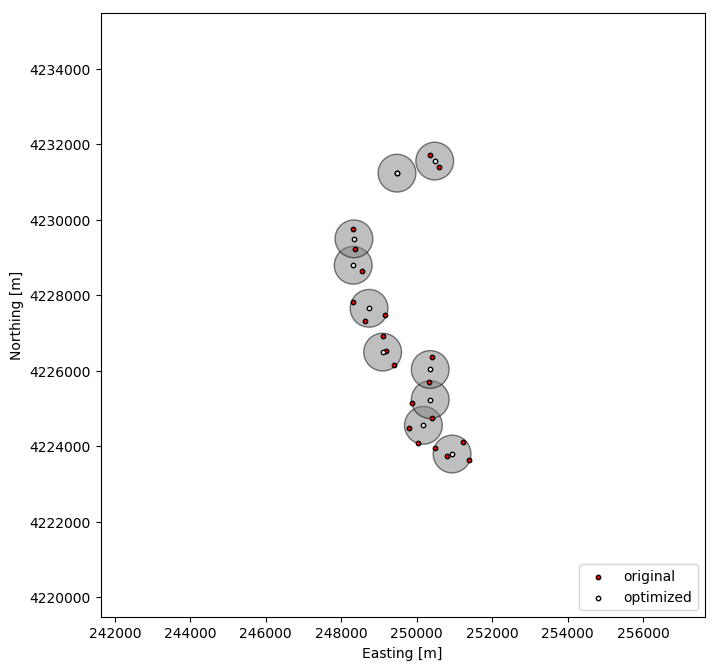

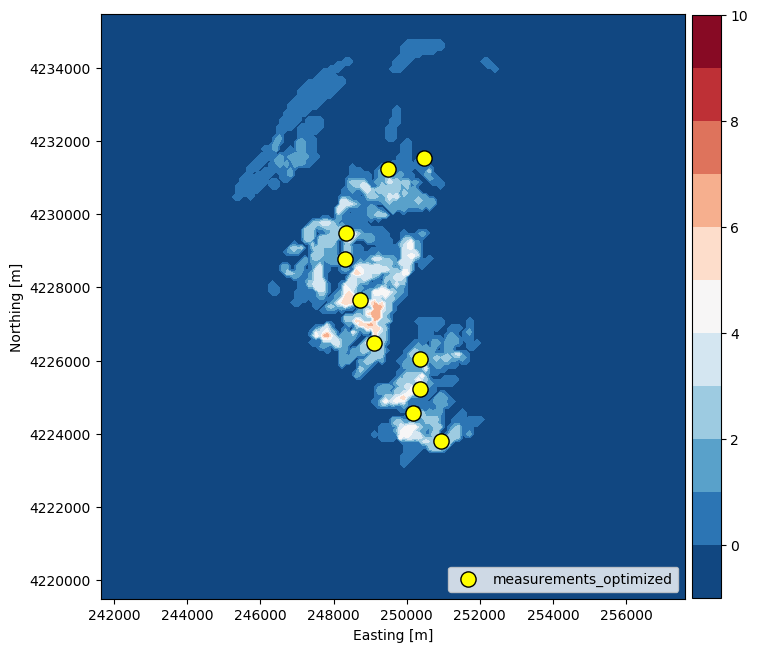

In [2]:
layout.plot_optimization()
layout.plot_layer(layout.combined_layer)

Lidar 1 position added!


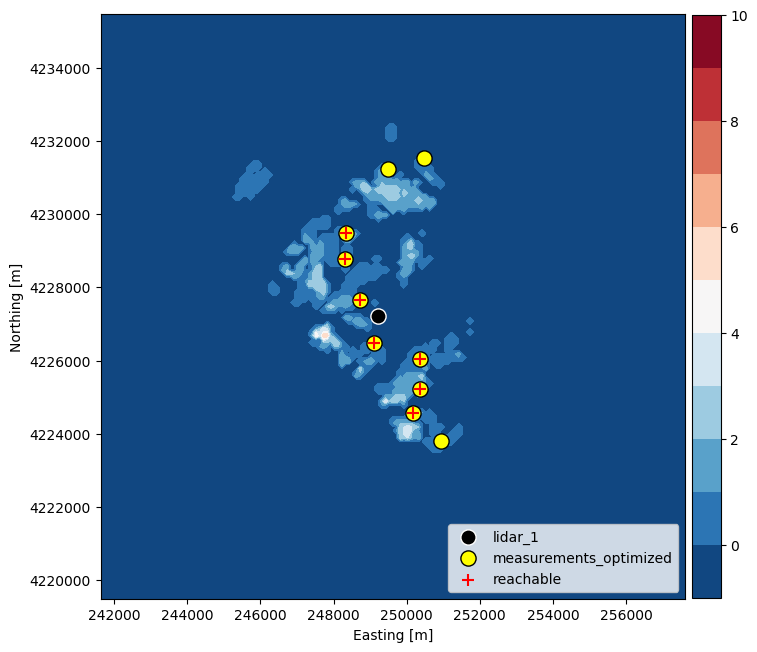

In [3]:
layout.FONT_SIZE = 10
layout.add_lidars(lidar_pos_1 = np.array([249224, 4227225, 0]))
layout.generate_second_lidar_layer()
layout.plot_layer(layout.second_lidar_layer)

In [4]:
layout.add_lidars(lidar_pos_2 = np.array([247760, 4226685, 0]))

Lidar 2 position added!


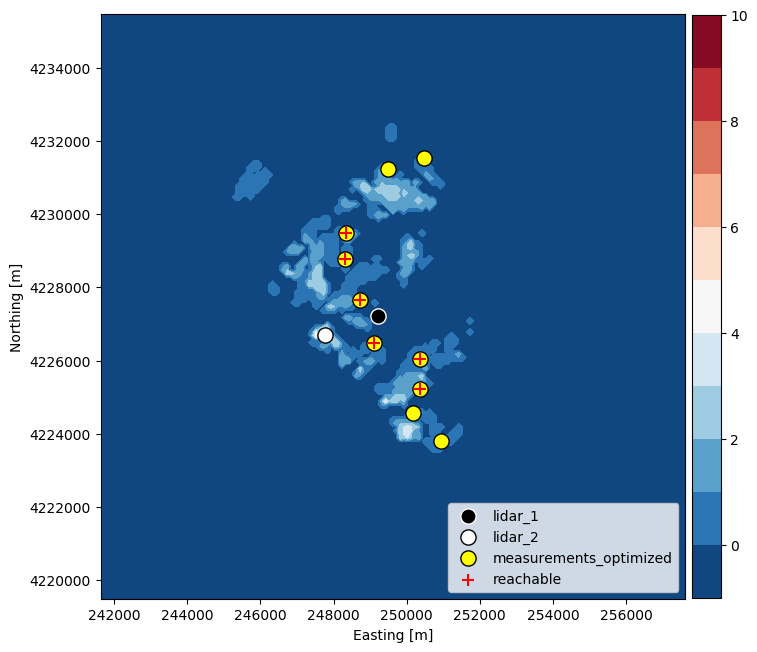

array([[2.487360e+05, 4.227651e+06, 1.610000e+03],
       [2.490960e+05, 4.226491e+06, 1.646000e+03],
       [2.503560e+05, 4.225231e+06, 1.676000e+03],
       [2.483160e+05, 4.228791e+06, 1.680000e+03],
       [2.483360e+05, 4.229491e+06, 1.734000e+03],
       [2.503560e+05, 4.226031e+06, 1.633000e+03]])

In [5]:
layout.generate_campaign_layout()

layout.plot_layer(layout.second_lidar_layer)
layout.measurements_reachable

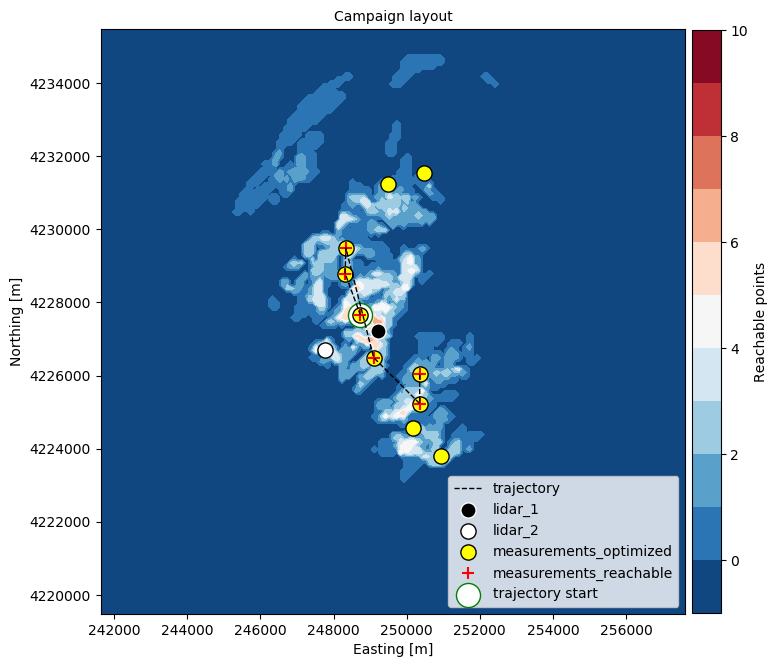

In [6]:
layout.FONT_SIZE = 10
layout.optimize_trajectory(shuffle_pts = True)
layout.plot_layout(save_plot = True)

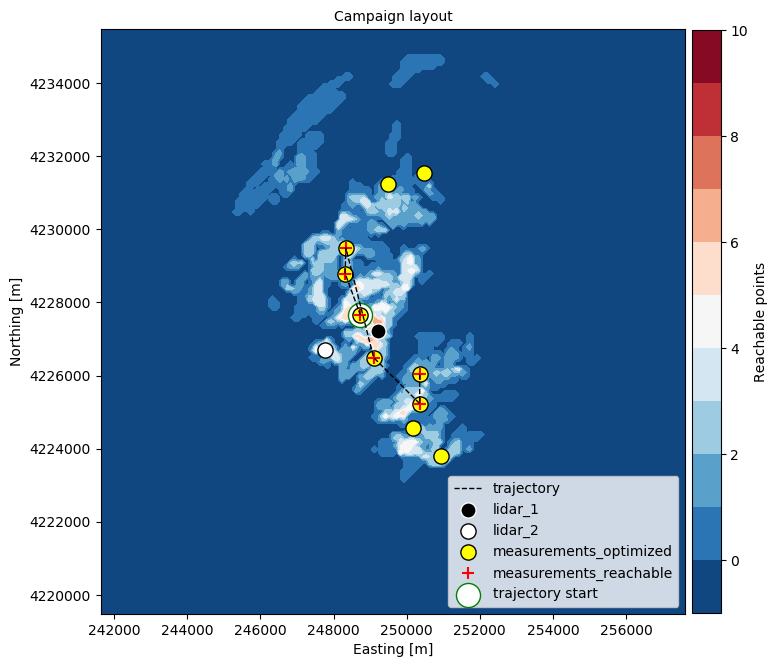

In [7]:
layout.MY_DPI = 100
layout.plot_layout(save_plot = True)

In [8]:
layout.FONT_SIZE

10